# Introduction to Data Science Project

# Study of Suicide Pattern 

# Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
dataset = pd.read_csv('missing_data.csv')

# Data Cleaning

In [3]:
dataset

Unnamed: 0     country  year     sex          age  suicides_no  \
0               0     Albania  1987    male  15-24 years           21   
1               1     Albania  1987    male  35-54 years           16   
2               2     Albania  1987  female  15-24 years           14   
3               3     Albania  1987    male    75+ years            1   
4               4         NaN  1987    male  25-34 years            9   
5               5     Albania  1987  female    75+ years            1   
6               6     Albania  1987  female  35-54 years            6   
7               7     Albania  1987  female  25-34 years            4   
8               8     Albania  1987    male  55-74 years            1   
9               9     Albania  1987  female   5-14 years            0   
10             10     Albania  1987  female  55-74 years            0   
11             11     Albania  1987    male   5-14 years            0   
12             12     Albania  1988  female    75+ years            2   
13             13     Albania  1988    male  15-24 years           17   
14             14         NaN  1988    male    75+ years            1   
15             15     Albania  1988    male  35-54 years           14   
16             16     Albania  1988    male  55-74 years            4   
17             17     Albania  1988  female  15-24 years            8   
18             18     Albania  1988  female  55-74 years            3   
19             19     Albania  1988  female  25-34 years            5   
20             20     Albania  1988    male  25-34 years            5   
21             21         NaN  1988  female  35-54 years            4   
22             22     Albania  1988  female   5-14 years            0   
23             23     Albania  1988    male   5-14 years            0   
24             24         NaN  1989    male    75+ years            2   
25             25     Albania  1989    male  25-34 years           18   
26             26     Albania  1989    male  35-54 years           15   
27             27     Albania  1989    male  55-74 years            6   
28             28     Albania  1989    male  15-24 years           12   
29             29     Albania  1989  female  35-54 years            7   
...           ...         ...   ...     ...          ...          ...   
27790       27790  Uzbekistan  2012  female  25-34 years          148   
27791       27791  Uzbekistan  2012  female  35-54 years           89   
27792       27792  Uzbekistan  2012    male   5-14 years           67   
27793       27793  Uzbekistan  2012  female  55-74 years           25   
27794       27794  Uzbekistan  2012  female    75+ years            4   
27795       27795  Uzbekistan  2012  female   5-14 years           16   
27796       27796  Uzbekistan  2013    male  35-54 years          481   
27797       27797  Uzbekistan  2013    male  25-34 years          328   
27798       27798  Uzbekistan  2013  female  15-24 years          323   
27799       27799  Uzbekistan  2013    male  15-24 years          320   
27800       27800  Uzbekistan  2013    male  55-74 years          119   
27801       27801  Uzbekistan  2013    male    75+ years           13   
27802       27802  Uzbekistan  2013  female  25-34 years          146   
27803       27803  Uzbekistan  2013  female  35-54 years           99   
27804       27804  Uzbekistan  2013  female    75+ years            8   
27805       27805  Uzbekistan  2013    male   5-14 years           61   
27806       27806  Uzbekistan  2013  female  55-74 years           21   
27807       27807  Uzbekistan  2013  female   5-14 years           31   
27808       27808  Uzbekistan  2014    male  35-54 years          519   
27809       27809  Uzbekistan  2014    male  25-34 years          318   
27810       27810  Uzbekistan  2014  female  15-24 years          347   
27811       27811  Uzbekistan  2014    male  55-74 years          144   
27812       27812  Uzbekistan  2014    male  15-24 years         

In [4]:
tab_info=pd.DataFrame(dataset.dtypes).T.rename(index={0:'column type'})
tab_info=tab_info.append(pd.DataFrame(dataset.isnull().sum()).T.rename(index={0:'null values'}))
tab_info=tab_info.append(pd.DataFrame(dataset.isnull().sum()/dataset.shape[0]*100).T.
                         rename(index={0:'null values (%)'}))
tab_info

Unnamed: 0  country   year     sex     age suicides_no  \
column type          int64   object  int64  object  object       int64   
null values              0     2879      0       0       0           0   
null values (%)          0  10.3487      0       0       0           0   

                population suicides/100k pop country-year HDI for year  \
column type          int64           float64       object      float64   
null values              0                 0            0        19456   
null values (%)          0                 0            0      69.9353   

                 gdp_for_year ($)  gdp_per_capita ($) generation  
column type                 object              int64     object  
null values                      0                  0          0  
null values (%)                  0                  0          0

In [62]:
dataset['country'].fillna(method='ffill', inplace=True)

In [63]:
dataset

Unnamed: 0     country  year     sex          age  suicides_no  \
0               0     Albania  1987    male  15-24 years           21   
1               1     Albania  1987    male  35-54 years           16   
2               2     Albania  1987  female  15-24 years           14   
3               3     Albania  1987    male    75+ years            1   
4               4     Albania  1987    male  25-34 years            9   
5               5     Albania  1987  female    75+ years            1   
6               6     Albania  1987  female  35-54 years            6   
7               7     Albania  1987  female  25-34 years            4   
8               8     Albania  1987    male  55-74 years            1   
9               9     Albania  1987  female   5-14 years            0   
10             10     Albania  1987  female  55-74 years            0   
11             11     Albania  1987    male   5-14 years            0   
12             12     Albania  1988  female    75+ years            2   
13             13     Albania  1988    male  15-24 years           17   
14             14     Albania  1988    male    75+ years            1   
15             15     Albania  1988    male  35-54 years           14   
16             16     Albania  1988    male  55-74 years            4   
17             17     Albania  1988  female  15-24 years            8   
18             18     Albania  1988  female  55-74 years            3   
19             19     Albania  1988  female  25-34 years            5   
20             20     Albania  1988    male  25-34 years            5   
21             21     Albania  1988  female  35-54 years            4   
22             22     Albania  1988  female   5-14 years            0   
23             23     Albania  1988    male   5-14 years            0   
24             24     Albania  1989    male    75+ years            2   
25             25     Albania  1989    male  25-34 years           18   
26             26     Albania  1989    male  35-54 years           15   
27             27     Albania  1989    male  55-74 years            6   
28             28     Albania  1989    male  15-24 years           12   
29             29     Albania  1989  female  35-54 years            7   
...           ...         ...   ...     ...          ...          ...   
27790       27790  Uzbekistan  2012  female  25-34 years          148   
27791       27791  Uzbekistan  2012  female  35-54 years           89   
27792       27792  Uzbekistan  2012    male   5-14 years           67   
27793       27793  Uzbekistan  2012  female  55-74 years           25   
27794       27794  Uzbekistan  2012  female    75+ years            4   
27795       27795  Uzbekistan  2012  female   5-14 years           16   
27796       27796  Uzbekistan  2013    male  35-54 years          481   
27797       27797  Uzbekistan  2013    male  25-34 years          328   
27798       27798  Uzbekistan  2013  female  15-24 years          323   
27799       27799  Uzbekistan  2013    male  15-24 years          320   
27800       27800  Uzbekistan  2013    male  55-74 years          119   
27801       27801  Uzbekistan  2013    male    75+ years           13   
27802       27802  Uzbekistan  2013  female  25-34 years          146   
27803       27803  Uzbekistan  2013  female  35-54 years           99   
27804       27804  Uzbekistan  2013  female    75+ years            8   
27805       27805  Uzbekistan  2013    male   5-14 years           61   
27806       27806  Uzbekistan  2013  female  55-74 years           21   
27807       27807  Uzbekistan  2013  female   5-14 years           31   
27808       27808  Uzbekistan  2014    male  35-54 years          519   
27809       27809  Uzbekistan  2014    male  25-34 years          318   
27810       27810  Uzbekistan  2014  female  15-24 years          347   
27811       27811  Uzbekistan  2014    male  55-74 years          144   
27812       27812  Uzbekistan  2014    male  15-24 years         

In [64]:
df =dataset.drop(["Unnamed: 0","country-year","suicides_no", "HDI for year"," gdp_for_year ($) ", "generation"], axis = 1)

In [65]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder() 
df['country']= le.fit_transform(df['country']) 
df['sex']= le.fit_transform(df['sex'])
df['age'] = df['age'].replace(['5-14 years'], 0)
df['age'] = df['age'].replace(['15-24 years'], 1)
df['age'] = df['age'].replace(['25-34 years'], 2)
df['age'] = df['age'].replace(['35-54 years'], 3)
df['age'] = df['age'].replace(['55-74 years'], 4)
df['age'] = df['age'].replace(['75+ years'], 5)
df

country  year  sex  age  population  suicides/100k pop  \
0            0  1987    1    1      312900               6.71   
1            0  1987    1    3      308000               5.19   
2            0  1987    0    1      289700               4.83   
3            0  1987    1    5       21800               4.59   
4            0  1987    1    2      274300               3.28   
5            0  1987    0    5       35600               2.81   
6            0  1987    0    3      278800               2.15   
7            0  1987    0    2      257200               1.56   
8            0  1987    1    4      137500               0.73   
9            0  1987    0    0      311000               0.00   
10           0  1987    0    4      144600               0.00   
11           0  1987    1    0      338200               0.00   
12           0  1988    0    5       36400               5.49   
13           0  1988    1    1      319200               5.33   
14           0  1988    1    5       22300               4.48   
15           0  1988    1    3      314100               4.46   
16           0  1988    1    4      140200               2.85   
17           0  1988    0    1      295600               2.71   
18           0  1988    0    4      147500               2.03   
19           0  1988    0    2      262400               1.91   
20           0  1988    1    2      279900               1.79   
21           0  1988    0    3      284500               1.41   
22           0  1988    0    0      317200               0.00   
23           0  1988    1    0      345000               0.00   
24           0  1989    1    5       22500               8.89   
25           0  1989    1    2      283600               6.35   
26           0  1989    1    3      318400               4.71   
27           0  1989    1    4      142100               4.22   
28           0  1989    1    1      323500               3.71   
29           0  1989    0    3      288600               2.43   
...        ...   ...  ...  ...         ...                ...   
27790      100  2012    0    2     2556673               5.79   
27791      100  2012    0    3     3474788               2.56   
27792      100  2012    1    0     2701361               2.48   
27793      100  2012    0    4     1283060               1.95   
27794      100  2012    0    5      338557               1.18   
27795      100  2012    0    0     2578408               0.62   
27796      100  2013    1    3     3346411              14.37   
27797      100  2013    1    2     2644648              12.40   
27798      100  2013    0    1     3039740              10.63   
27799      100  2013    1    1     3171202              10.09   
27800      100  2013    1    4     1202790               9.89   
27801      100  2013    1    5      221002               5.88   
27802      100  2013    0    2     2647820               5.51   
27803      100  2013    0    3     3547895               2.79   
27804      100  2013    0    5      345180               2.32   
27805      100  2013    1    0     2720938               2.24   
27806      100  2013    0    4     1356298               1.55   
27807      100  2013    0    0     2595000               1.19   
27808      100  2014    1    3     3421300              15.17   
27809      100  2014    1    2     2739150              11.61   
27810      100  2014    0    1     2992817              11.59   
27811      100  2014    1    4     1271111              11.33   
27812      100  2014    1    1     3126905              11.10   
27813      100  2014    1    5      224995               7.56   
27814      100  2014    0    2     2735238               5.92   
27815      100  2014    0    3     3620833               2.96   
27816      100  2014    0    5      348465               2.58   
27817      100  2014    1    0     2762158               2.17   
27818      100  2014    0    0     2631600               1.67   
27819      100  2014    0    4     1438935

# Data Visualization

In [8]:
sns.pairplot(df)

In [67]:
import plotly.express as px
ax2 = px.scatter(df, x='suicides/100k pop', y='gdp_per_capita ($)', color = 'age', hover_data=['age'])
#fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species",size='petal_length', hover_data=['petal_width'])
ax2.show()

In [9]:
plt.barh(dataset['country'], dataset['suicides/100k pop'])
plt.xlabel('country')
plt.ylabel('suicides/100k pop')
plt.title('country suicide rates')
plt.show()

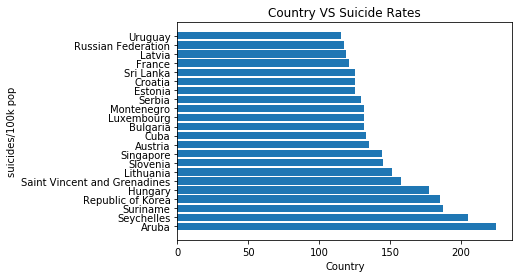

In [69]:
top100 = dataset.sort_values(ascending = False, by = 'suicides/100k pop')[['country','suicides/100k pop']].head(100)
plt.barh(top100["country"], top100['suicides/100k pop'])
plt.xlabel('Country')
plt.ylabel('suicides/100k pop')
plt.title('Country VS Suicide Rates')
plt.show()

In [79]:
age14 = 0
age24 = 0
age34 = 0
age54 = 0
age74 = 0
age75 = 0
for i in df['age']:
    if(df['age'][i]==0):
        age14 += df["population"][i]*df['suicides/100k pop'][i]*1000
    elif(df['age'][i]==1):
        age24 += df["population"][i]*df['suicides/100k pop'][i]*1000
    elif(df['age'][i]==2):
        age34 += df["population"][i]*df['suicides/100k pop'][i]*1000
    elif(df['age'][i]==3):
        age54 += df["population"][i]*df['suicides/100k pop'][i]*1000
    elif(df['age'][i]==4):
        age74 += df["population"][i]*df['suicides/100k pop'][i]*1000
    elif(df['age'][i]==5):
        age75 += df["population"][i]*df['suicides/100k pop'][i]*1000
sum = 100 / (age14+age24+age34+age54+age74+age75)
print(" 5-14 years : ", age14*sum)
print("15-24 years : ", age24*sum)
print("25-34 years : ", age34*sum)
print("35-54 years : ", age54*sum)
print("55-74 years : ", age74*sum)
print("  75+ years : ", age75*sum)
pie1 = pd.DataFrame({'age': [age14, age24, age34, age54, age74, age75]}, index= ['5-14 years', '15-24 year', '25-34 years', '35-54 years','55-75 years', '75+years'])
plot = pie1.plot.pie(y='age', figsize=(5, 5))
plt.legend(loc="lower left", bbox_transform=plt.gcf().transFigure)

 5-14 years :  0.0
15-24 years :  56.35660629335799
25-34 years :  14.552057127148146
35-54 years :  25.854897120485024
55-74 years :  0.0
  75+ years :  3.2364394590088406


MALE 43.61344537815102 %
FEMALE 56.38655462184899 %
difference = 21143.200000005032


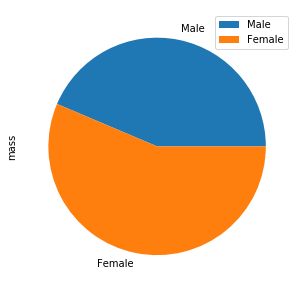

In [12]:
male = 0
for i in df['sex']:
    if (i==1):
        male= male + df['suicides/100k pop'][i]
female = 0
for i in df['sex']:
    if (i==0):
        female= female + df['suicides/100k pop'][i]
print("MALE", ((male / (male+female))*100), "%")
print("FEMALE", ((female / (male+female))*100), "%")
print("difference =", female - male)
pie = pd.DataFrame({'mass': [male, female]}, index= ['Male', 'Female'])
plot = pie.plot.pie(y='mass', figsize=(5, 5))

# Normalizing data

In [13]:
x = df["suicides/100k pop"].replace(0, 0.0000000001)

In [14]:
from scipy import stats
normalized_data = stats.boxcox(x)
# plot both together to compare
fig, ax=plt.subplots(1,2)
sns.distplot(df["suicides/100k pop"], ax=ax[0])
ax[0].set_title("Original Data")
sns.distplot(normalized_data[0], ax=ax[1])
ax[1].set_title("Normalized data")

Text(0.5, 1.0, 'Normalized data')

In [36]:
standardized_data = df['suicides/100k pop']
standardized_data.shape

(27820,)

In [37]:
standardized_data = standardized_data.values.reshape(-1, 1)

In [20]:
from sklearn import preprocessing
# Create the Scaler object
scaler = preprocessing.StandardScaler()
# Fit your data on the scaler object
scaled_df = scaler.fit_transform(standardized_data)
scaled_df = pd.DataFrame(scaled_df, columns=['suicides/100k pop'])

Text(0.5, 1.0, 'Standardized data')

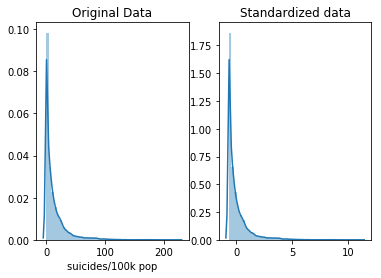

In [38]:
# plot both together to compare
fig, ax3 = plt.subplots(1,2)
sns.distplot(df["suicides/100k pop"], ax=ax3[0])
ax3[0].set_title("Original Data")
sns.distplot(scaled_df, ax=ax3[1])
ax3[1].set_title("Standardized data")

# Classification Model - Logistic Regression

In [22]:
new_df = df

In [23]:
new_df

country  year  sex  age  population  suicides/100k pop  \
0            0  1987    1    1      312900               6.71   
1            0  1987    1    3      308000               5.19   
2            0  1987    0    1      289700               4.83   
3            0  1987    1    5       21800               4.59   
4            0  1987    1    2      274300               3.28   
5            0  1987    0    5       35600               2.81   
6            0  1987    0    3      278800               2.15   
7            0  1987    0    2      257200               1.56   
8            0  1987    1    4      137500               0.73   
9            0  1987    0    0      311000               0.00   
10           0  1987    0    4      144600               0.00   
11           0  1987    1    0      338200               0.00   
12           0  1988    0    5       36400               5.49   
13           0  1988    1    1      319200               5.33   
14           0  1988    1    5       22300               4.48   
15           0  1988    1    3      314100               4.46   
16           0  1988    1    4      140200               2.85   
17           0  1988    0    1      295600               2.71   
18           0  1988    0    4      147500               2.03   
19           0  1988    0    2      262400               1.91   
20           0  1988    1    2      279900               1.79   
21           0  1988    0    3      284500               1.41   
22           0  1988    0    0      317200               0.00   
23           0  1988    1    0      345000               0.00   
24           0  1989    1    5       22500               8.89   
25           0  1989    1    2      283600               6.35   
26           0  1989    1    3      318400               4.71   
27           0  1989    1    4      142100               4.22   
28           0  1989    1    1      323500               3.71   
29           0  1989    0    3      288600               2.43   
...        ...   ...  ...  ...         ...                ...   
27790      100  2012    0    2     2556673               5.79   
27791      100  2012    0    3     3474788               2.56   
27792      100  2012    1    0     2701361               2.48   
27793      100  2012    0    4     1283060               1.95   
27794      100  2012    0    5      338557               1.18   
27795      100  2012    0    0     2578408               0.62   
27796      100  2013    1    3     3346411              14.37   
27797      100  2013    1    2     2644648              12.40   
27798      100  2013    0    1     3039740              10.63   
27799      100  2013    1    1     3171202              10.09   
27800      100  2013    1    4     1202790               9.89   
27801      100  2013    1    5      221002               5.88   
27802      100  2013    0    2     2647820               5.51   
27803      100  2013    0    3     3547895               2.79   
27804      100  2013    0    5      345180               2.32   
27805      100  2013    1    0     2720938               2.24   
27806      100  2013    0    4     1356298               1.55   
27807      100  2013    0    0     2595000               1.19   
27808      100  2014    1    3     3421300              15.17   
27809      100  2014    1    2     2739150              11.61   
27810      100  2014    0    1     2992817              11.59   
27811      100  2014    1    4     1271111              11.33   
27812      100  2014    1    1     3126905              11.10   
27813      100  2014    1    5      224995               7.56   
27814      100  2014    0    2     2735238               5.92   
27815      100  2014    0    3     3620833               2.96   
27816      100  2014    0    5      348465               2.58   
27817      100  2014    1    0     2762158               2.17   
27818      100  2014    0    0     2631600               1.67   
27819      100  2014    0    4     1438935

In [24]:
new_df.loc[df['suicides/100k pop'] > new_df['suicides/100k pop'].mean(), 'Suicide Level'] = 1
new_df.loc[df['suicides/100k pop'] < new_df['suicides/100k pop'].mean(), 'Suicide Level'] = 0

In [25]:
count1 = 0
count2 = 0
for i in new_df["Suicide Level"]:
    if i==1:
        count1 +=1
    if i==0:
        count2 +=1
print (count1, count2)

8759 19061


In [26]:
new_df

country  year  sex  age  population  suicides/100k pop  \
0            0  1987    1    1      312900               6.71   
1            0  1987    1    3      308000               5.19   
2            0  1987    0    1      289700               4.83   
3            0  1987    1    5       21800               4.59   
4            0  1987    1    2      274300               3.28   
5            0  1987    0    5       35600               2.81   
6            0  1987    0    3      278800               2.15   
7            0  1987    0    2      257200               1.56   
8            0  1987    1    4      137500               0.73   
9            0  1987    0    0      311000               0.00   
10           0  1987    0    4      144600               0.00   
11           0  1987    1    0      338200               0.00   
12           0  1988    0    5       36400               5.49   
13           0  1988    1    1      319200               5.33   
14           0  1988    1    5       22300               4.48   
15           0  1988    1    3      314100               4.46   
16           0  1988    1    4      140200               2.85   
17           0  1988    0    1      295600               2.71   
18           0  1988    0    4      147500               2.03   
19           0  1988    0    2      262400               1.91   
20           0  1988    1    2      279900               1.79   
21           0  1988    0    3      284500               1.41   
22           0  1988    0    0      317200               0.00   
23           0  1988    1    0      345000               0.00   
24           0  1989    1    5       22500               8.89   
25           0  1989    1    2      283600               6.35   
26           0  1989    1    3      318400               4.71   
27           0  1989    1    4      142100               4.22   
28           0  1989    1    1      323500               3.71   
29           0  1989    0    3      288600               2.43   
...        ...   ...  ...  ...         ...                ...   
27790      100  2012    0    2     2556673               5.79   
27791      100  2012    0    3     3474788               2.56   
27792      100  2012    1    0     2701361               2.48   
27793      100  2012    0    4     1283060               1.95   
27794      100  2012    0    5      338557               1.18   
27795      100  2012    0    0     2578408               0.62   
27796      100  2013    1    3     3346411              14.37   
27797      100  2013    1    2     2644648              12.40   
27798      100  2013    0    1     3039740              10.63   
27799      100  2013    1    1     3171202              10.09   
27800      100  2013    1    4     1202790               9.89   
27801      100  2013    1    5      221002               5.88   
27802      100  2013    0    2     2647820               5.51   
27803      100  2013    0    3     3547895               2.79   
27804      100  2013    0    5      345180               2.32   
27805      100  2013    1    0     2720938               2.24   
27806      100  2013    0    4     1356298               1.55   
27807      100  2013    0    0     2595000               1.19   
27808      100  2014    1    3     3421300              15.17   
27809      100  2014    1    2     2739150              11.61   
27810      100  2014    0    1     2992817              11.59   
27811      100  2014    1    4     1271111              11.33   
27812      100  2014    1    1     3126905              11.10   
27813      100  2014    1    5      224995               7.56   
27814      100  2014    0    2     2735238               5.92   
27815      100  2014    0    3     3620833               2.96   
27816      100  2014    0    5      348465               2.58   
27817      100  2014    1    0     2762158               2.17   
27818      100  2014    0    0     2631600               1.67   
27819      100  2014    0    4     1438935

In [28]:
X = df.drop(["suicides/100k pop", "Suicide Level"], axis = 1)
Y = df.iloc[:, 7].values

In [29]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

D:\programfiles\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
D:\programfiles\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)
D:\programfiles\anaconda3\lib\site-packages\ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype int32, int64 were all converted to float64 by StandardScaler.
  after removing the cwd from sys.path.


In [31]:
# Fitting Logistic Regression to the Training set
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(X_train, y_train)

D:\programfiles\anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=0, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

In [32]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)


In [33]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)


In [34]:
cm

array([[4265,  533],
       [ 912, 1245]], dtype=int64)

In [ ]:
accuracy = (cm[0][0]+cm[1][1]) / cm.sum()
print accuracy

# Hypothesis Testing

H0:Pattern of Suicide rates for men and women are same


H1:Pattern Suicide rate for men and women are different

In [101]:
grouped_data = df.groupby('sex')

In [145]:
female = grouped_data.get_group(0)
male = grouped_data.get_group(1)
female= female["suicides/100k pop"].replace(0, np.NaN)
male= male["suicides/100k pop"].replace(0, np.NaN)
female = stats.boxcox(female)
male = stats.boxcox(male)
female = pd.DataFrame(female[0])
male = pd.DataFrame(male[0])
female = female.dropna()
male = male.dropna()

In [152]:
from scipy import stats
## Calculate the Standard Deviation
#Calculate the variance to get the standard deviation
#For unbiased max likelihood estimate we have to divide the var by N-1, and therefore the parameter ddof = 1
var_fm = female[0].var(ddof=1)
var_m = male[0].var(ddof=1)

print("varience female :", var_fm)
print("varience male :", var_m)

#std deviation
sd_fe = np.sqrt(var_fm)
sd_m = np.sqrt(var_m)
print("standard deviation female :", sd_fe)
print("standard deviation male :", sd_m)

## Calculate the t-statistics
t = (female[0].mean() - male[0].mean())/(np.sqrt((var_fm/female[0].count()) + (var_m/male[0].count())))
print (t)
## Compare with the critical t-value
#Degrees of freedom
df = female[0].count() + male[0].count() -2

#p-value after comparison with the t
p = 1 - stats.t.cdf(t,df=df)

print("t = ", t)
print("p = ", p)

### You can see that after comparing the t statistic with the critical t value (computed internally) we get a good p value of 0.0005 and thus we reject the null hypothesis and thus it proves that the mean of the two distributions are different and statistically significant.
## Cross Checking with the internal scipy function
t2, p2 = stats.ttest_ind(female[0], male[0], equal_var = False)
print("t = ", t2)
print("p = ", p2)

#accepting or rejecting Null value
if p < 0.05:    # alpha value is 0.05 or 5%
    print(" we are rejecting null hypothesis")
    print(" there is no statistically significant difference between the two populations")

else:
    print("we not rejecting null hypothesis")
    print(" there is probably no statistically significant difference between the two populations")
    

varience female : 1.3989937225313264e+30
varience male : 1.1991075311678703e+34
standard deviation female : 1182790650339833.5
standard deviation male : 1.0950376848163128e+17
-3.683352602988501
t =  -3.683352602988501
p =  0.9998846491740314
t =  -3.6833526029885797
p =  0.00023117399301467403
we not rejecting null hypothesis
 there is probably no statistically significant difference between the two populations
